Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Examples 4.35, 4.37 and 4.38 

Simulation of a Markov chain representing the locations of cars belonging to a car-rental company\
Topics: [Time-homogeneous Markov chains](https://www.youtube.com/watch?v=j3LNC2MA6LA), [stationary distribution](https://www.youtube.com/watch?v=VRRMIMGJUmo)

Author: Carlos Fernandez-Granda

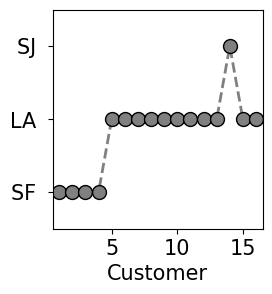

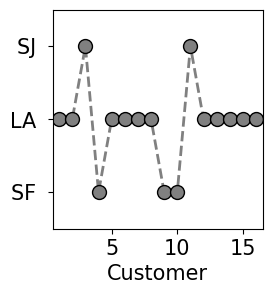

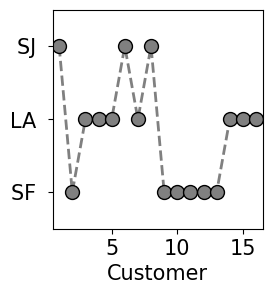

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2022)

font_size = 15

n = 16
n_realizations = 3

# Transition matrix
T = np.array([[0.6, 0.1, 0.3],[ 0.2, 0.8, 0.3],[ 0.2 ,0.1, 0.4]])
# Initial state
p0 = np.array([1./3,1./3,1./3])

y = [0, 1, 2]
labels = ['SF ', 'LA ', 'SJ ']

for i in range(n_realizations):
    
    realization = np.zeros(n)
    realization[0] = np.random.choice(3,p=p0)    
    pi = p0
    
    for j in range(1,n):     
        realization[j] = np.random.choice(3,p=T[:,int(realization[j-1])])
        
    plt.figure(figsize=(3, 3))  
    plt.xticks(fontsize=font_size) 
    plt.yticks(y,labels,fontsize=font_size) 
    plt.xlabel("i", fontsize=font_size)  
    plt.xlim( 0.5, n+0.5 )
    plt.ylim( -0.5, 2.5 )
    plt.xlabel("Customer", fontsize=font_size)  
    plt.plot(np.arange(1,n+1),realization,color='gray',linestyle="dashed",markeredgecolor="black",markerfacecolor="gray",lw=2,marker='o',markersize=10)
    plt.gcf().subplots_adjust(left=0.2)
    plt.gcf().subplots_adjust(bottom=0.15)

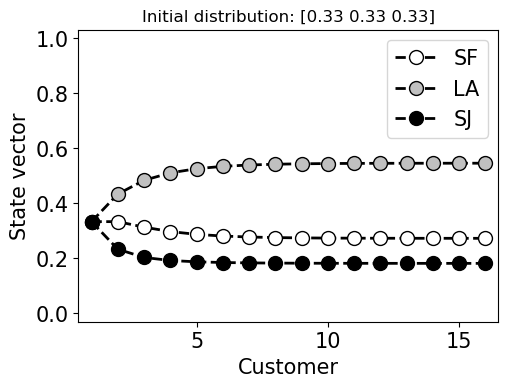

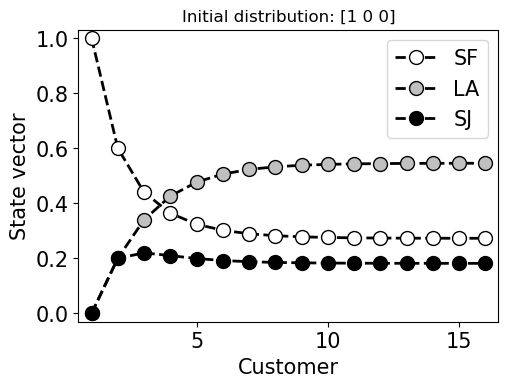

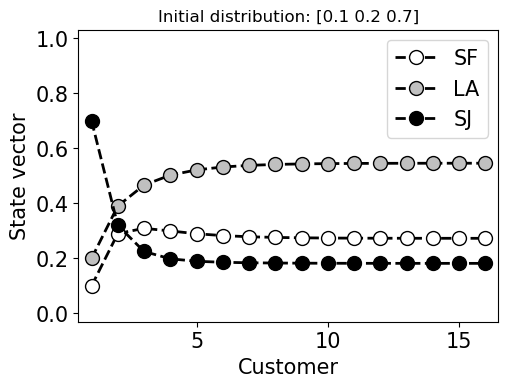

In [6]:
# Initial states
p0 = [ np.array([1./3,1./3,1./3]), np.array([1,0,0]),np.array([0.1,0.2,0.7]) ]

for i in range(len(p0)):
    
    prob = np.zeros((3,n))
    prob[:,0] = p0[i]
    for j in range(n-1):
        prob[:,j+1] = np.dot(T,prob[:,j])
        
    plt.figure(figsize=(6, 4)) 
    inds = np.arange(1,n+1)
    plt.xticks(np.arange(0,n+1,5),fontsize=font_size) 
    plt.yticks(fontsize=font_size) 
    plt.xlabel("i", fontsize=font_size)  
    plt.xlim( 0.5, n + 0.5 )
    plt.ylim( -0.03, 1.03 )
    plt.ylabel("State vector", fontsize=font_size)  
    plt.xlabel("Customer", fontsize=font_size)  
    plt.plot(inds,prob[0,:],color='black',linestyle="dashed",lw=2,marker='o',markersize=10,markerfacecolor="white",markeredgecolor="black", label='SF')
    plt.plot(inds,prob[1,:],color='black',linestyle="dashed",lw=2,marker='o',markersize=10,markerfacecolor="silver",markeredgecolor="black", label='LA')
    plt.plot(inds,prob[2,:],color='black',linestyle="dashed",lw=2,marker='o',markersize=10,markerfacecolor="black",markeredgecolor="black", label='SJ')
    plt.gcf().subplots_adjust(left=0.2)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.legend(fontsize=font_size)
    plt.title("Initial distribution: "+ str(np.round(p0[i],2)));